**Natural Language Understanding ( Search using embedding model )**


NLU systems aim to comprehend and interpret human language in a meaningful way. The AI model is trained to understand the context and semantics of words and documents to perform tasks like document similarity search based on the input query.

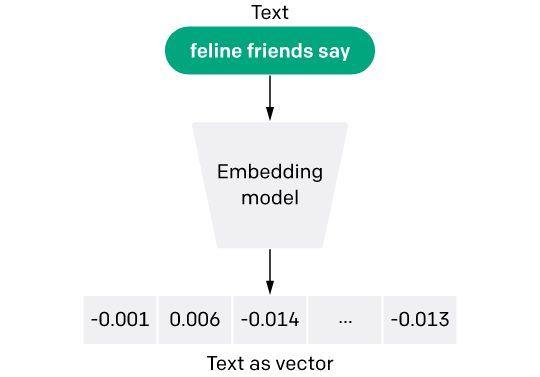

In [11]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

corpus = [
    "apple is a fruit",
    "banana is also a fruit",
    "python is a programming language",
    "java is another programming language"
]

tokenized_corpus = [sentence.split() for sentence in corpus]

model = Word2Vec(tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

def create_document_embedding(doc_tokens, model):
    embeddings = [model.wv[word] for word in doc_tokens if word in model.wv]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.vector_size)

document_embeddings = [create_document_embedding(tokens, model) for tokens in tokenized_corpus]


def search(query, model, document_embeddings, corpus):
    query_tokens = query.split()
    query_embedding = create_document_embedding(query_tokens, model)

    similarities = [cosine_similarity([query_embedding], [doc_embedding])[0][0] for doc_embedding in document_embeddings]

    results = [(similarity, document) for similarity, document in zip(similarities, corpus)]
    results.sort(reverse=True)

    return results


query = "banana fruit"


search_results = search(query, model, document_embeddings, corpus)


for similarity, document in search_results:
    print(f"Similarity: {similarity:.2f} - Document: {document}")


Similarity: 0.60 - Document: banana is also a fruit
Similarity: 0.30 - Document: apple is a fruit
Similarity: 0.06 - Document: java is another programming language
Similarity: -0.04 - Document: python is a programming language
